# Network Graph Visualizations

## Contents
    Import Libraries and Data
    NetworkX - Static Network Graph
    Pyvis - Interactive Network Graph
    Community Detection - Leiden Algorithm
    Degree Centrality
    Closeness Centrality
    Betweenness Centrality

## Import Libraries and Data

In [1]:
# Import librarires
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Import relationship data
relationship_df = pd.read_csv('country_relationship.csv', index_col = 0)

In [8]:
# Check relationship data
relationship_df

,source,target,value
0,France,United Kingdom,55
1,France,Germany,42
2,Austria,Germany,2
3,Austria,Hungary,2
4,Hungary,Russia,8
...,...,...,...
122,Canada,Russia,4
123,"China, People's Republic of",United States,12
124,India,South Africa,3
125,Rwanda,South Africa,5


In [11]:
# Renaming certain countries in dataframe for clarity and readability
relationship_df_2 = relationship_df.replace({"China, People's Republic of": 'China',
                                             'Korea, North': 'North Korea',
                                             'Korea, South': 'South Korea'})

In [12]:
# Check succes of name change in dataframe
relationship_df_2

,source,target,value
0,France,United Kingdom,55
1,France,Germany,42
2,Austria,Germany,2
3,Austria,Hungary,2
4,Hungary,Russia,8
...,...,...,...
122,Canada,Russia,4
123,China,United States,12
124,India,South Africa,3
125,Rwanda,South Africa,5


In [13]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df_2, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

## NetworkX - Static Network Graph

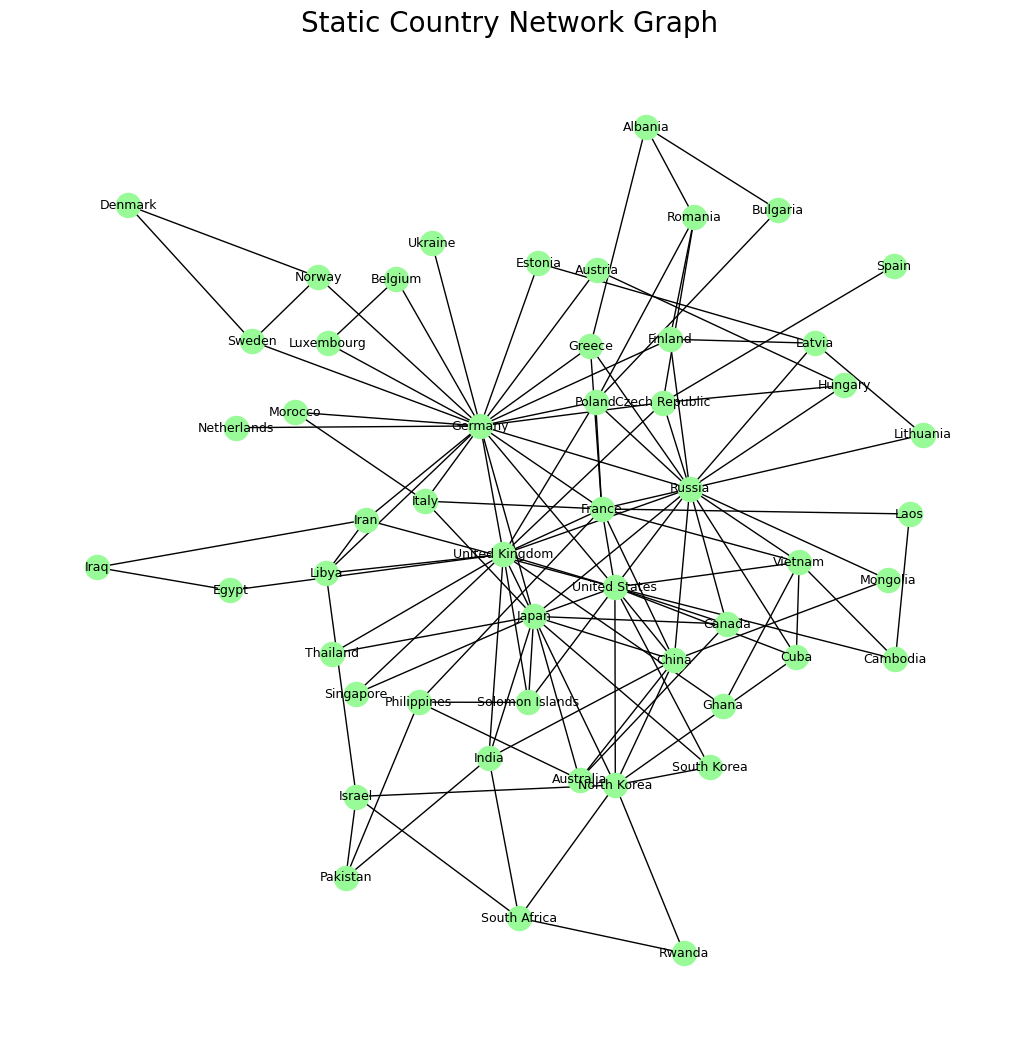

In [16]:
h = plt.figure(figsize = (10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'palegreen', edge_cmap = plt.cm.Blues, pos = pos, font_size=9)
plt.title('Static Country Network Graph', fontsize=20)
plt.show() 

#### Already in the static netowrk graph we can see the countries that have the most connections in the network. Germany, Russia, United States, United Kingdom, Japan, France are all centrally located and have multiple edges coming off their nodes. This tells us that these countries had a lot of involvement and influence in many events of the 20th century. On the other side, we can see that countries such as Spain, Iraq, Rwanda, Denmark, Lithuania, Ukraine, and a few others only have one or two connections in the network. This tells us that these countries had minimal involvement over the span of the 20th century and did not largely influence other countries but instead were likely the ones being influenced.

In [17]:
# Save plot as html file
h.savefig('networkx_plt_country.png')

## Pyvis - Interactive Network Graph

In [18]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("country.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


#### Now with our interactive graph we can see not only the amount of connections with other countries (like in the static graph), but the amount of connections of one country with each other country. For example, we can tell that Germany has the most connections since it's node is the largest and we can see that it has the most connections with the United States, Russia, and the United Kingdom based on the size of the edges between Germany and those countries. This lets us know that these countries have had a plethora of interactions throughout the 20th century. Another thing I noticed is that the edge between the United States and Japan seems to be the largest in the network. This tells me that the US and Japan have had the most interaction, or at least the most significant influence over each other, out of all the countries in the 20th century.

## Community Detection - Leiden Algorithm

In [21]:
# Install igraph package for leiden algorithm
!pip install python-igraph

In [22]:
# Install leidenalg pacakge for leiden algorithm
!pip install leidenalg

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------------------- -------------------- 0.8/1.6 MB 6.6 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 6.4 MB/s eta 0:00:00


In [33]:
# Import algorithms module from cdlib to run leiden algorithm
from cdlib import algorithms
coms = algorithms.leiden(G)

In [34]:
# Verify object type after community detection
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [35]:
# Map communities
new_com = coms.to_node_community_map()

In [36]:
# Check new_com
new_com

defaultdict(list,
            {'Hungary': [0],
             'Russia': [0],
             'Czech Republic': [0],
             'Spain': [0],
             'Poland': [0],
             'Latvia': [0],
             'Lithuania': [0],
             'Finland': [0],
             'Greece': [0],
             'Albania': [0],
             'Romania': [0],
             'Bulgaria': [0],
             'Mongolia': [0],
             'Germany': [1],
             'Austria': [1],
             'Ukraine': [1],
             'Italy': [1],
             'Estonia': [1],
             'Belgium': [1],
             'Luxembourg': [1],
             'Norway': [1],
             'Sweden': [1],
             'Denmark': [1],
             'Morocco': [1],
             'Netherlands': [1],
             'United Kingdom': [2],
             'Japan': [2],
             'China': [2],
             'Thailand': [2],
             'Singapore': [2],
             'Solomon Islands': [2],
             'Philippines': [2],
             'Australia': [2

In [37]:
# Put the output from new_com into a dictionary
dict_com = {k:v[0] for k,v in new_com.items()}

In [38]:
# Check dict_com
dict_com

{'Hungary': 0,
 'Russia': 0,
 'Czech Republic': 0,
 'Spain': 0,
 'Poland': 0,
 'Latvia': 0,
 'Lithuania': 0,
 'Finland': 0,
 'Greece': 0,
 'Albania': 0,
 'Romania': 0,
 'Bulgaria': 0,
 'Mongolia': 0,
 'Germany': 1,
 'Austria': 1,
 'Ukraine': 1,
 'Italy': 1,
 'Estonia': 1,
 'Belgium': 1,
 'Luxembourg': 1,
 'Norway': 1,
 'Sweden': 1,
 'Denmark': 1,
 'Morocco': 1,
 'Netherlands': 1,
 'United Kingdom': 2,
 'Japan': 2,
 'China': 2,
 'Thailand': 2,
 'Singapore': 2,
 'Solomon Islands': 2,
 'Philippines': 2,
 'Australia': 2,
 'India': 2,
 'Pakistan': 2,
 'Canada': 2,
 'France': 3,
 'United States': 3,
 'Laos': 3,
 'Cambodia': 3,
 'Vietnam': 3,
 'Ghana': 3,
 'Cuba': 3,
 'Israel': 4,
 'North Korea': 4,
 'South Africa': 4,
 'South Korea': 4,
 'Rwanda': 4,
 'Libya': 5,
 'Egypt': 5,
 'Iraq': 5,
 'Iran': 5}

In [39]:
# Rerun network graph with the communities as an argument
nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("country_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


#### The partitions do, for the most part, make sense according to history. While I could genreally understand the community partitions, I used AI to help with specific examples and references from history, here is the breakdown:
    - Green community: These countries are primarily located in Eastern and Southern Europe and historically, many of them share connections through Soviet (Russia) influence during the Cold War (e.g. Hungary, Poland, Romania, and Bulgaria). The presence of Mongolia in this group is a bit strange but may be included due to it's connection to Russia as a Soviet ally and it geographic proximity to the region.
    - Red community: This group is a cluster of mostly Western and Northern European countries. These European countries are closely aligned politically and economically as they are a part of the European Union (EU) or other alliances like NATO. The inclusion of Morocco is intereesting but may be due to its colonial connections with European nations, it's proximity to Europe, and trade relationships.
    - Yellow community: This is a more diverse group including the United Kingdom, several Asia-Pacific countries, and Canada. However, there is a strong historical connection of the UK, Canada, India, Pakistan, and Australia with the British Empire. And although the Asian (Japan, Signapore) and Pacific Island countries don't necessarily have that connection they do share close trade ties with the western countries in this community (UK and Canada). 
    - Blue community: This group includes the US, France, and other diverse countries with historical links. France's colonial history links it with Ghana, Laos, Cambodia, and Vietnam. The US shares a connection with Vietnam throught the Vietnam War as well as complex ties with Cuba from the Cold War.
    - Purple community: The countries in this group share a geopolitical significance. Israel has historical partnerships with South Korea and Rwanda due to development cooperation. South Africa and Rwanda are major African nations that are developing their global connections. And North and South Korea share goegraphic and political interdependence.
    - Pink community: This is a pretty strightforward group of Middle Eastern and North African countries. They share goepolotical histories of colonialsm, oil politics, and religious ties.
#### Overall the partitions do a good job of reflecting geographic proximity, like in the Green, Red, and Pink communities, historical alliances such as colonial relationships, as in the Yellow and Blue communities, and geopolitical connections like in the Purple community. There are a few outliers and unexpected connections such as Mongolia in the Green community and Cuba in the Blue. This could be caused by complexities in the text and may need further investigation into the data or graph structure. 

## Degree Centrality

In [40]:
# Calculating degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'France': 0.21568627450980393,
 'United Kingdom': 0.27450980392156865,
 'Germany': 0.4117647058823529,
 'Austria': 0.0392156862745098,
 'Hungary': 0.058823529411764705,
 'Russia': 0.3333333333333333,
 'Ukraine': 0.0196078431372549,
 'United States': 0.27450980392156865,
 'Czech Republic': 0.11764705882352941,
 'Italy': 0.0784313725490196,
 'Spain': 0.0196078431372549,
 'Poland': 0.11764705882352941,
 'Estonia': 0.0392156862745098,
 'Latvia': 0.0784313725490196,
 'Lithuania': 0.0392156862745098,
 'Finland': 0.0784313725490196,
 'Belgium': 0.0392156862745098,
 'Luxembourg': 0.0392156862745098,
 'Norway': 0.058823529411764705,
 'Sweden': 0.058823529411764705,
 'Denmark': 0.0392156862745098,
 'Greece': 0.0784313725490196,
 'Albania': 0.058823529411764705,
 'Libya': 0.0784313725490196,
 'Egypt': 0.0392156862745098,
 'Iraq': 0.0392156862745098,
 'Iran': 0.0784313725490196,
 'Japan': 0.27450980392156865,
 'Morocco': 0.0392156862745098,
 'Netherlands': 0.0196078431372549,
 'China': 0.15686274

In [41]:
# Putting degree centrality dictionary into a dataframe
degree_df = pd.DataFrame(degree_dict.items(), columns=['country','centrality'])

In [43]:
# Checking dataframe
degree_df

,country,centrality
0,France,0.215686
1,United Kingdom,0.274510
2,Germany,0.411765
3,Austria,0.039216
4,Hungary,0.058824
5,Russia,0.333333
6,Ukraine,0.019608
7,United States,0.274510
8,Czech Republic,0.117647
9,Italy,0.078431


In [44]:
# Sorting by centrality values
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [45]:
# Checking the sort
degree_df

,country,centrality
2,Germany,0.411765
5,Russia,0.333333
1,United Kingdom,0.274510
27,Japan,0.274510
7,United States,0.274510
0,France,0.215686
39,North Korea,0.156863
30,China,0.156863
8,Czech Republic,0.117647
43,Vietnam,0.117647


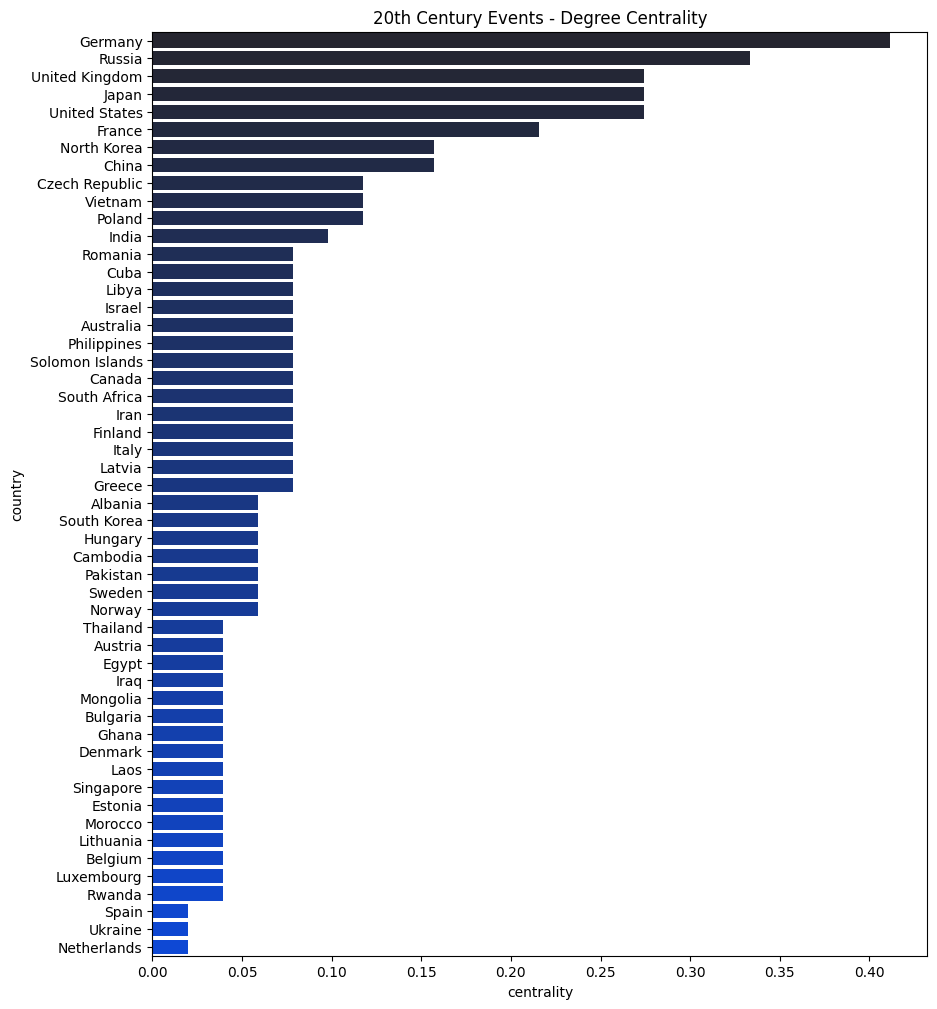

In [50]:
# Plotting the degree centrality
plt.figure(figsize = (10, 12))
with sns.dark_palette("xkcd:blue", 52):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = degree_df).set_title("20th Century Events - Degree Centrality")

plt.savefig('centrality_degree_plot.png', dpi=300, bbox_inches='tight')

#### Our degree centrality calculation shows that Germany has the most edges (connections) to other countries in the network. Next comes Russia followed by the United Kingdom, Japan, and the United Sates. It makes sense that Germany has the highest degree centrality based on what we know in history. Germany had many connections to other countries in the 20th century due to the First and Second World War where they invaded and controlled several Eastern European countries and fought against Western Europe, the United States, and Russia. So, its easy to see how Germany has the highest degree centrality in this network. The other top countries, Russia, UK, Japan, US, were among the other superpowers during this time. They were the top players in the wars of the era and had a hand in most of the events of the 20th century due to their global influence.

## Closeness Centrality

In [51]:
# Calculating closeness centrality and putting it in a dataframe
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['country','centrality'])

In [52]:
# Checking dataframe
closeness_df

,country,centrality
0,France,0.525773
1,United Kingdom,0.560440
2,Germany,0.607143
3,Austria,0.386364
4,Hungary,0.375000
5,Russia,0.560440
6,Ukraine,0.380597
7,United States,0.542553
8,Czech Republic,0.463636
9,Italy,0.439655


In [53]:
# Sorting values by closeness centrality
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [54]:
# Checking sort
closeness_df

,country,centrality
2,Germany,0.607143
5,Russia,0.560440
1,United Kingdom,0.560440
7,United States,0.542553
27,Japan,0.536842
0,France,0.525773
11,Poland,0.472222
8,Czech Republic,0.463636
30,China,0.451327
9,Italy,0.439655


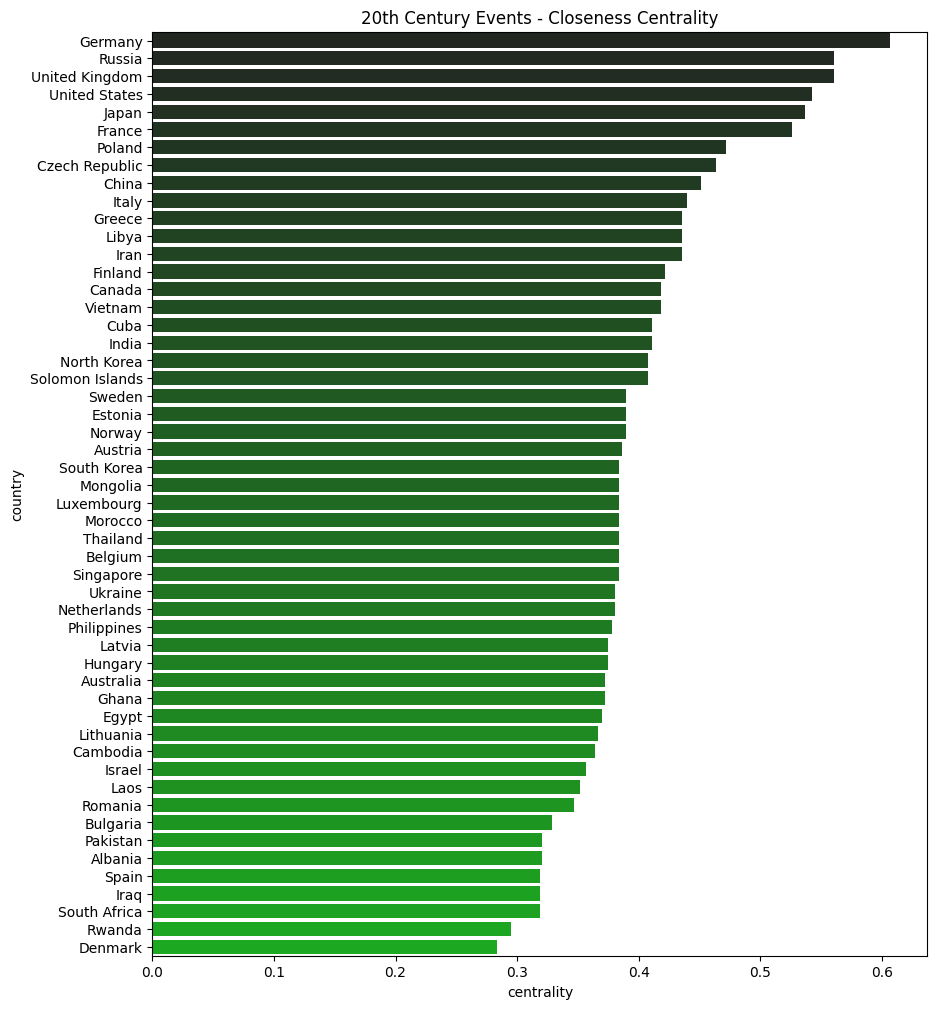

In [56]:
# Plotting the closeness centrality
plt.figure(figsize = (10, 12))
with sns.dark_palette("xkcd:green", 52):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = closeness_df).set_title("20th Century Events - Closeness Centrality")

plt.savefig('centrality_closeness_plot.png', dpi=300, bbox_inches='tight')

#### In the measure of closeness centrality, Germany still has the highest value. This makes sense as the closeness centrality calculates the shortest paths between any two nodes and because Germany had interactions with the majority of the countries on this list during the 20th century, as well as multiple interactions with many of them, it stands that Germany would be the most central link in this network. I also noticed that these values are much closer to each other and there is less difference in the values as we move down the list, unlike the degree centrality where the values between countries were much more drastic. This is likely due to this measure of closeness that shows these countries are much more interconnected. This is important becuase it tells us the countries at the top of the list (Germany, Russia, UK, US, Japan, France) are the central figures in the 20th century and played the biggest part in the outcome of most of the events.

## Betweenness Centrality

In [59]:
# Calculating betweenness centrality and putting it in a dataframe
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame(betweenness_dict.items(), columns=['country','centrality'])

In [60]:
# Checking dataframe
betweenness_df

,country,centrality
0,France,0.093369
1,United Kingdom,0.169637
2,Germany,0.409527
3,Austria,0.003277
4,Hungary,0.003163
5,Russia,0.193837
6,Ukraine,0.000000
7,United States,0.124494
8,Czech Republic,0.058207
9,Italy,0.005107


In [63]:
# Sorting by betweenness centrality values
betweenness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

In [64]:
# Checking sort
betweenness_df

,country,centrality
2,Germany,0.409527
5,Russia,0.193837
1,United Kingdom,0.169637
27,Japan,0.128172
7,United States,0.124494
0,France,0.093369
39,North Korea,0.065853
8,Czech Republic,0.058207
11,Poland,0.052965
36,India,0.038133


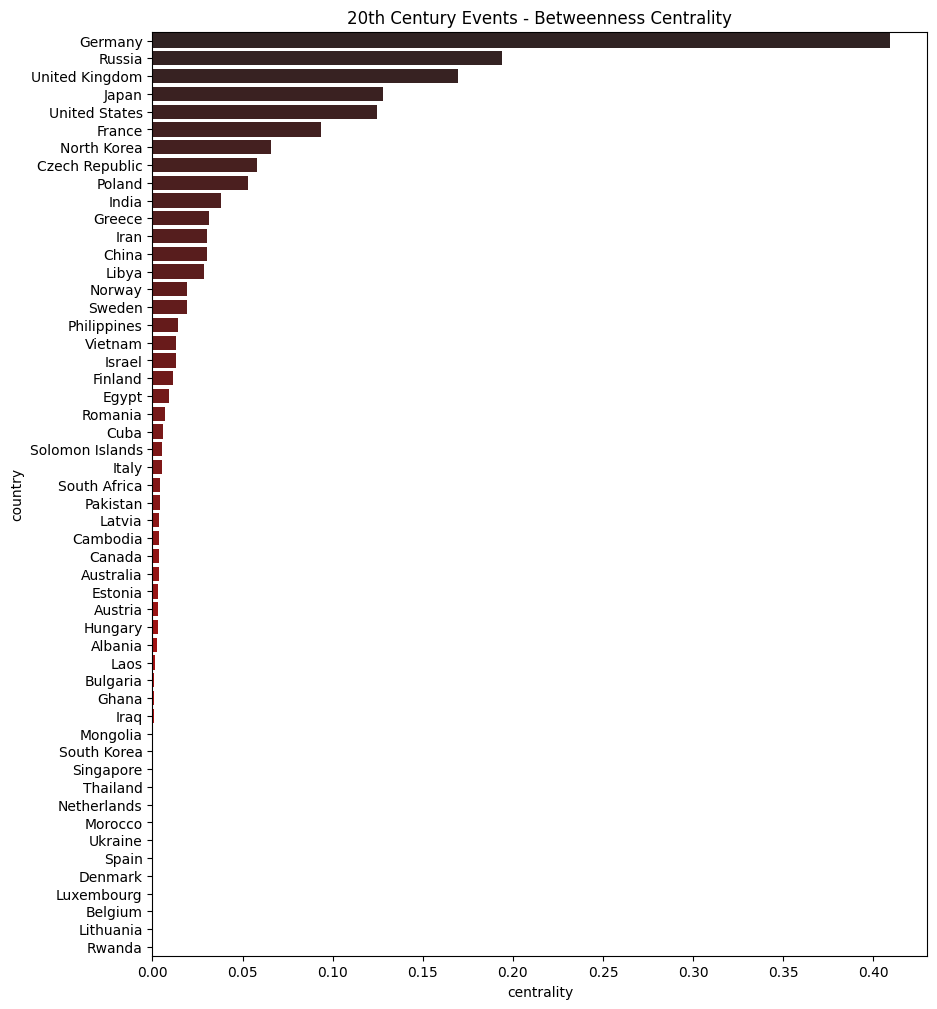

In [75]:
# Plotting betweenness centrality measures
plt.figure(figsize = (10, 12))
with sns.dark_palette("xkcd:red", 52):
    sns.barplot(x = "centrality", y = "country",
    saturation = 0.9, data = betweenness_df).set_title("20th Century Events - Betweenness Centrality")

plt.savefig('centrality_betweenness_plot.png', dpi=300, bbox_inches='tight')

#### In this measure of bewtweenness centrality that measures the number of paths a country lies on, Germany, by far, seems to be the link between all the other countires. Again, this makes sense since almost every country on this list was either invaded by Germany, at war with Germany, or an ally of Germany, and if they weren't any of those things then there is likley still an indirect link to Germany through a country that does have a direct link. This tells us that not only is Germany a key player, but the outcomes of the events that Germany was involved in may have an indirect affect on subsequent events in the 20th century.

In [74]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')